In [1]:
import numpy as np, tensorflow as tf, tensorflow_datasets as tfds, matplotlib.pyplot as plt
from tensorflow import keras
tfds.disable_progress_bar()

In [2]:
(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True)

In [4]:
info.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

# Encoder

In [3]:
encoder = info.features['text'].encoder

In [4]:
sample_string = 'Hello TensorFlow.'

In [5]:
encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]


# Prepare the data for training

In [6]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, train_data.output_shapes))

test_batches = (
    test_data
    .padded_batch(32, train_data.output_shapes))

In [7]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, train_data.output_shapes))

test_batches = (
    test_data
    .padded_batch(32, train_data.output_shapes))

# Model

In [8]:
model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model

In [10]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================]949 - accuracy: 0.46 - 1s 532ms/step - loss: 0.6916 - accuracy: 0.578 - 1s 363ms/step - loss: 0.6919 - accuracy: 0.562 - 1s 278ms/step - loss: 0.6924 - accuracy: 0.546 - 1s 226ms/step - loss: 0.6923 - accuracy: 0.550 - 1s 193ms/step - loss: 0.6929 - accuracy: 0.531 - 1s 169ms/step - loss: 0.6937 - accuracy: 0.500 - 1s 150ms/step - loss: 0.6941 - accuracy: 0.484 - 1s 136ms/step - loss: 0.6936 - accuracy: 0.496 - 1s 124ms/step - loss: 0.6935 - accuracy: 0.500 - 1s 115ms/step - loss: 0.6938 - accuracy: 0.485 - 1s 107ms/step - loss: 0.6938 - accuracy: 0.487 - 1s 100ms/step - loss: 0.6934 - accuracy: 0.502 - 1s 95ms/step - loss: 0.6936 - accuracy: 0.497 - 1s 89ms/step - loss: 0.6935 - accuracy: 0.49 - 1s 85ms/step - loss: 0.6933 - accuracy: 0.50 - 1s 82ms/step - loss: 0.6934 - accuracy: 0.50 - 1s 78ms/step - loss: 0.6934 - accuracy: 0.50 - 1s 75ms/step - loss: 0.6935 - accuracy: 0.49 - 1s 72ms/step - loss: 0.6934 - accuracy: 0.49 - 1s 70ms/

# Evaluate the Model

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

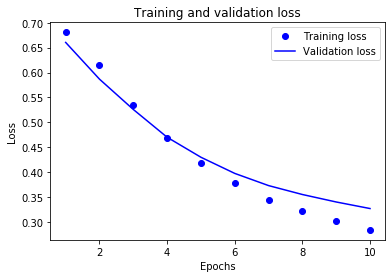

In [15]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

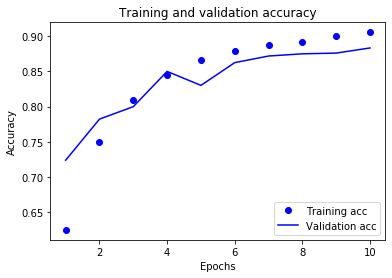

In [16]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()